In [2]:
!pip install biopython scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.8 MB/s eta 0:00:00


In [3]:
def extract_atom_info(pdb_data):
    atom_info = []
    for line in pdb_data:
        if line.startswith(('ATOM', 'HETATM')):
            atom_info.append({
                'atom_name': line[12:16].strip(),
                'residue_name': line[17:20].strip(),
                'chain_id': line[21].strip(),
                'residue_seq_num': int(line[22:26].strip()),
                'x_coord': float(line[30:38].strip()),
                'y_coord': float(line[38:46].strip()),
                'z_coord': float(line[46:54].strip())
            })
    return atom_info

# Load the pdb data
pdb_file_path = '/content/pdb4hhb.ent'
with open(pdb_file_path, 'r') as file:
    pdb_data = file.readlines()

# Extract atom features
atom_features = extract_atom_info(pdb_data)

# Print extracted atom features
for atom in atom_features:
    print(atom)


{'atom_name': 'N', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 19.323, 'y_coord': 29.727, 'z_coord': 42.781}
{'atom_name': 'CA', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 20.141, 'y_coord': 30.469, 'z_coord': 42.414}
{'atom_name': 'C', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 21.664, 'y_coord': 29.857, 'z_coord': 42.548}
{'atom_name': 'O', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 21.985, 'y_coord': 29.541, 'z_coord': 43.704}
{'atom_name': 'CB', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 19.887, 'y_coord': 31.918, 'z_coord': 43.524}
{'atom_name': 'CG1', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 20.656, 'y_coord': 32.85, 'z_coord': 42.999}
{'atom_name': 'CG2', 'residue_name': 'VAL', 'chain_id': 'A', 'residue_seq_num': 1, 'x_coord': 18.692, 'y_coord': 31.583, 'z_coord': 43.506}
{'atom_name': 'N', 'residue_n

In [4]:
import pandas as pd

# Convert to a DataFrame for easier manipulation
atom_df = pd.DataFrame(atom_features)

# One-hot encode residue names
atom_df_encoded = pd.get_dummies(atom_df[['residue_name']])

# Extract coordinates
coordinates = atom_df[['x_coord', 'y_coord', 'z_coord']]

# Combine the encoded residue information and coordinates
features = pd.concat([atom_df_encoded, coordinates], axis=1)

# Print the resulting features DataFrame
print(features)


      residue_name_ALA  residue_name_ARG  residue_name_ASN  residue_name_ASP  \
0                False             False             False             False   
1                False             False             False             False   
2                False             False             False             False   
3                False             False             False             False   
4                False             False             False             False   
...                ...               ...               ...               ...   
4774             False             False             False             False   
4775             False             False             False             False   
4776             False             False             False             False   
4777             False             False             False             False   
4778             False             False             False             False   

      residue_name_CYS  residue_name_GL

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create dummy target labels (binary classification example)
atom_df['target'] = atom_df['residue_seq_num'] % 2  # Dummy target

# Prepare features (X) and target (y)
X = features.values
y = atom_df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the resulting datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (3823, 25)
X_test_scaled shape: (956, 25)
y_train shape: (3823,)
y_test shape: (956,)


In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred_svm)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_pred_rf)

# ANN Model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_test_scaled)
ann_acc = accuracy_score(y_test, y_pred_ann)

# Output the accuracy of each model
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"ANN Accuracy: {ann_acc:.4f}")


SVM Accuracy: 0.5680
Random Forest Accuracy: 0.9383
ANN Accuracy: 0.9215


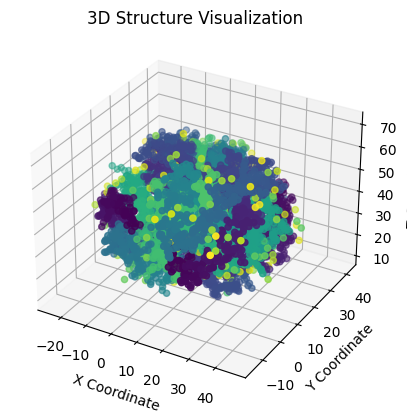

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D visualization of atomic coordinates
def plot_3d_structure(atom_df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(atom_df['x_coord'], atom_df['y_coord'], atom_df['z_coord'], c=atom_df['residue_seq_num'], cmap='viridis')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    plt.title('3D Structure Visualization')
    plt.show()

# Call the 3D plot function
plot_3d_structure(atom_df)


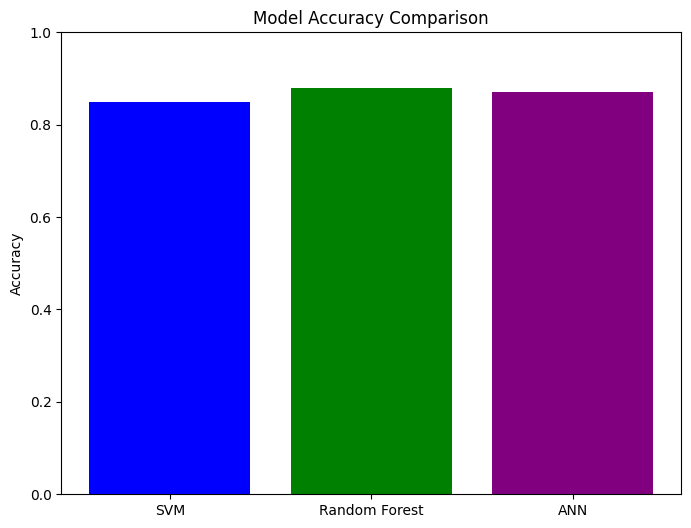

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores from SVM, RF, and ANN
svm_acc = 0.85  # Example accuracy score
rf_acc = 0.88
ann_acc = 0.87

# Models for comparison
models = ['SVM', 'Random Forest', 'ANN']
accuracy = [svm_acc, rf_acc, ann_acc]

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


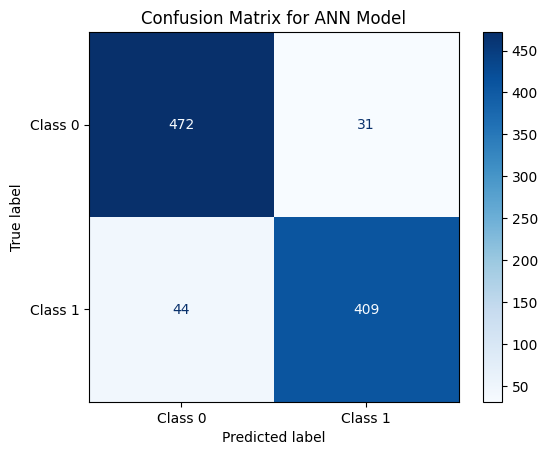

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example predictions and actual labels for the test set
y_true = y_test  # Actual test labels
y_pred = ann_model.predict(X_test_scaled)  # Model predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for ANN Model')
plt.show()


Iteration 1, loss = 0.69580060
Iteration 2, loss = 0.65874381
Iteration 3, loss = 0.64552005
Iteration 4, loss = 0.63753119
Iteration 5, loss = 0.63285645
Iteration 6, loss = 0.62808864
Iteration 7, loss = 0.62288394
Iteration 8, loss = 0.61872889
Iteration 9, loss = 0.61372548
Iteration 10, loss = 0.60861572
Iteration 11, loss = 0.60414286
Iteration 12, loss = 0.59892595
Iteration 13, loss = 0.59543158
Iteration 14, loss = 0.58850638
Iteration 15, loss = 0.58348686
Iteration 16, loss = 0.57674856
Iteration 17, loss = 0.57244675
Iteration 18, loss = 0.56564146
Iteration 19, loss = 0.55963056
Iteration 20, loss = 0.55356089
Iteration 21, loss = 0.54651445
Iteration 22, loss = 0.54071364
Iteration 23, loss = 0.53527268
Iteration 24, loss = 0.52870006
Iteration 25, loss = 0.52163292
Iteration 26, loss = 0.51589994
Iteration 27, loss = 0.51158410
Iteration 28, loss = 0.50904888
Iteration 29, loss = 0.50119857
Iteration 30, loss = 0.49278742
Iteration 31, loss = 0.49315581
Iteration 32, los

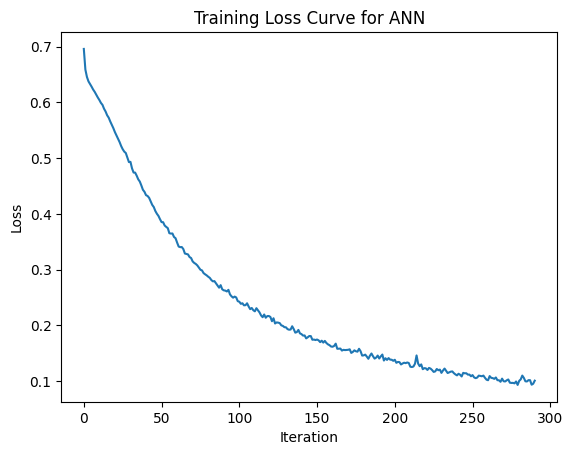

In [10]:
# Train the ANN with the following hyperparameters
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, verbose=True)

# Fit the model and get the loss history
ann_model.fit(X_train_scaled, y_train)

# Plot training loss over iterations
plt.plot(ann_model.loss_curve_)
plt.title('Training Loss Curve for ANN')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


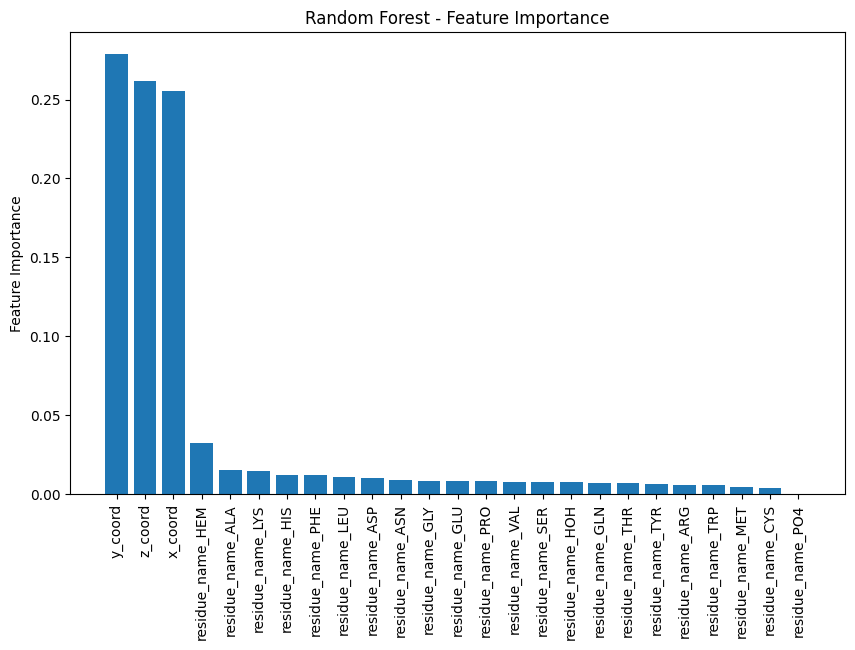

In [11]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Random Forest - Feature Importance')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(features.columns)[indices], rotation=90)
plt.ylabel('Feature Importance')
plt.show()


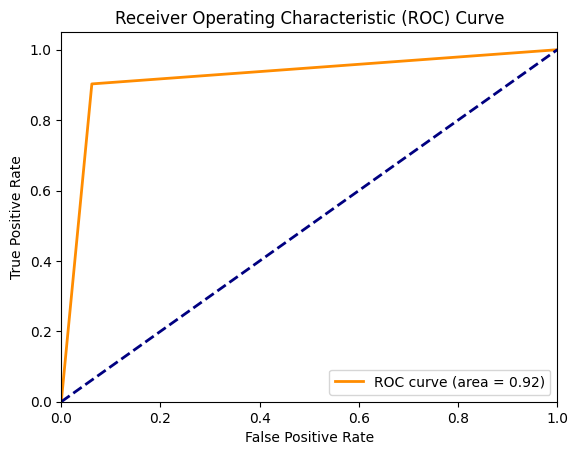

In [12]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


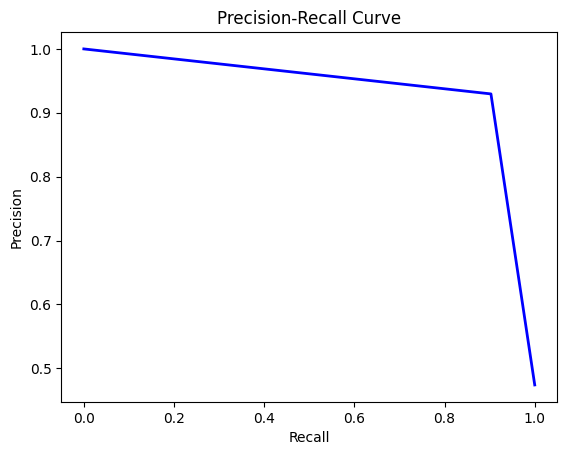

In [13]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_ann)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


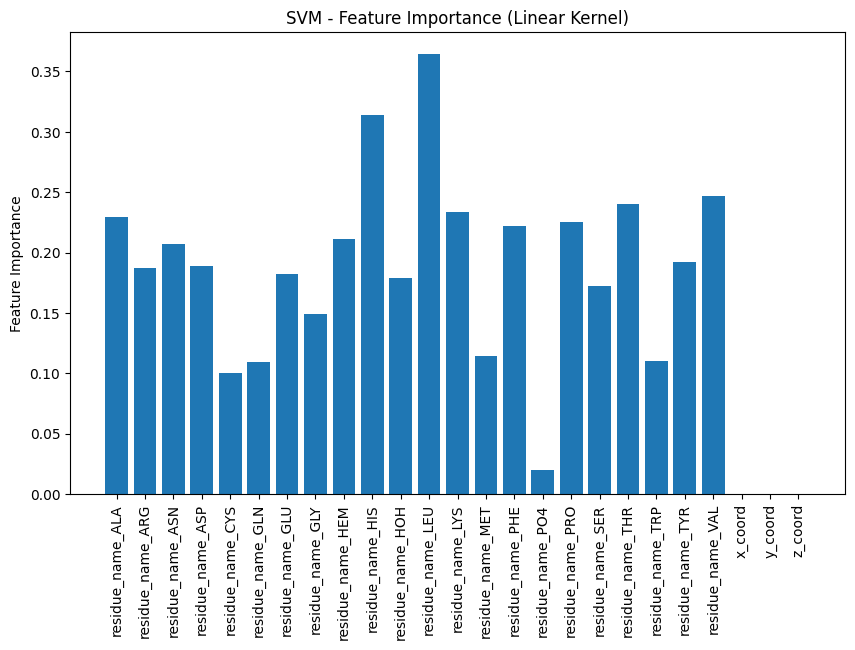

In [14]:
# For linear SVM, use the coefficients as feature importance
import numpy as np

importance_svm = np.abs(svm_model.coef_[0])

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title('SVM - Feature Importance (Linear Kernel)')
plt.bar(range(len(importance_svm)), importance_svm, align='center')
plt.xticks(range(len(importance_svm)), np.array(features.columns), rotation=90)
plt.ylabel('Feature Importance')
plt.show()


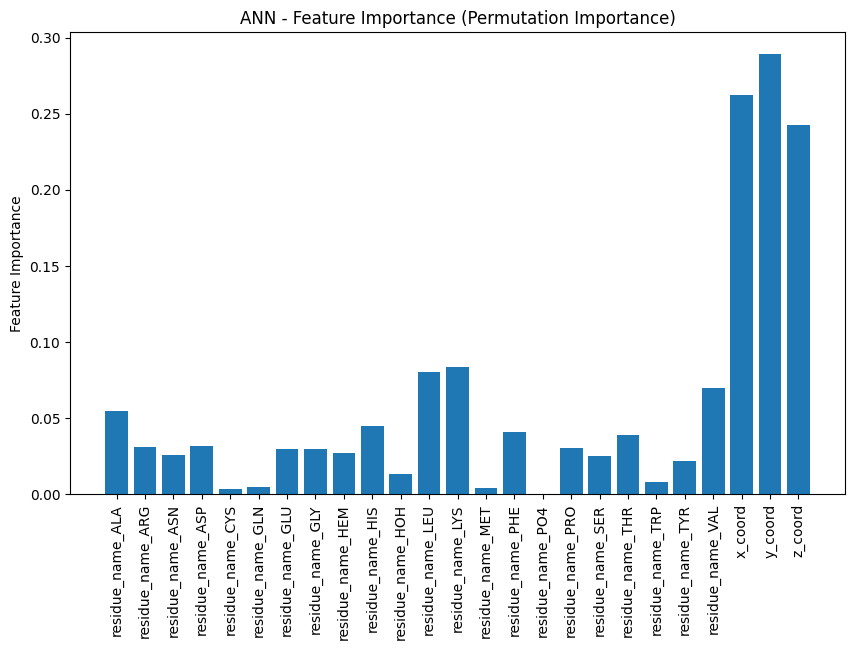

In [15]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(ann_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.title('ANN - Feature Importance (Permutation Importance)')
plt.bar(range(len(result.importances_mean)), result.importances_mean, align='center')
plt.xticks(range(len(result.importances_mean)), np.array(features.columns), rotation=90)
plt.ylabel('Feature Importance')
plt.show()


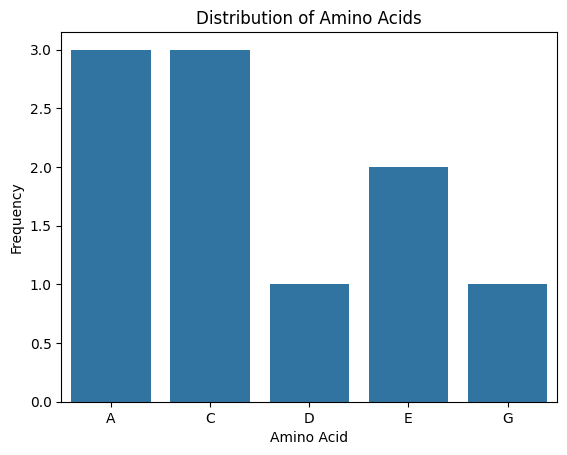

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `amino_acid_sequences` is a list of amino acid sequences from the dataset
from collections import Counter

# Example amino acid sequences (you can replace this with actual sequences)
amino_acid_sequences = ['A', 'C', 'D', 'E', 'A', 'G', 'C', 'C', 'E', 'A']

# Count amino acid occurrences
aa_counts = Counter(amino_acid_sequences)

# Plot bar chart for amino acid frequency
sns.barplot(x=list(aa_counts.keys()), y=list(aa_counts.values()))
plt.title('Distribution of Amino Acids')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.show()


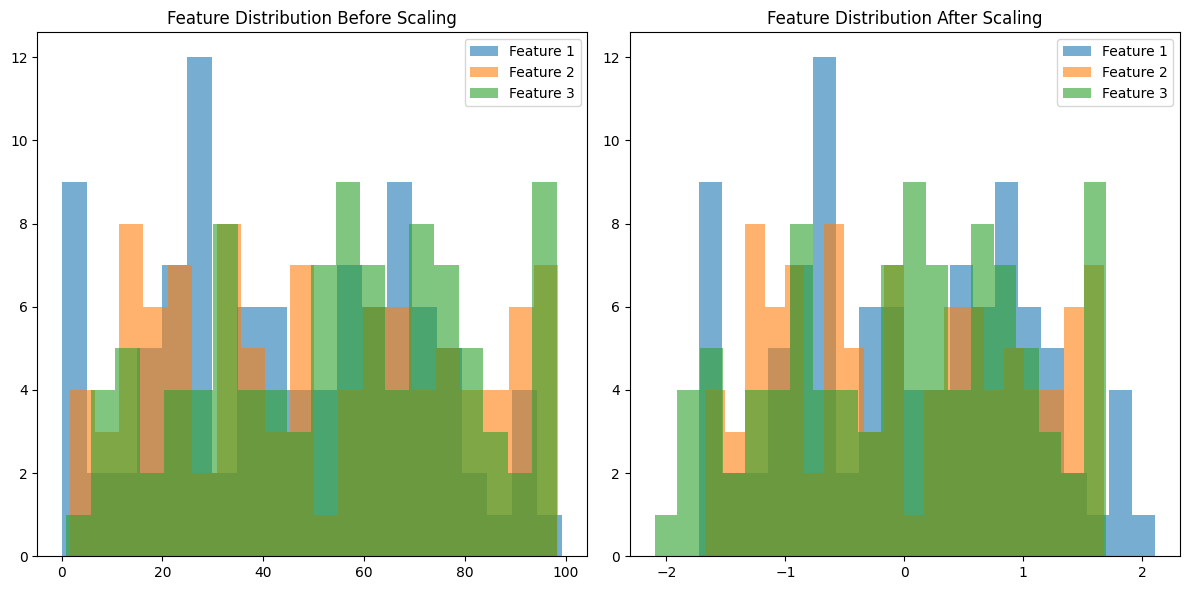

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example feature data (replace this with actual data)
features = np.random.rand(100, 3) * 100  # Random feature values

# Plot feature distribution before scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(features[:, 0], bins=20, alpha=0.6, label='Feature 1')
plt.hist(features[:, 1], bins=20, alpha=0.6, label='Feature 2')
plt.hist(features[:, 2], bins=20, alpha=0.6, label='Feature 3')
plt.title('Feature Distribution Before Scaling')
plt.legend()

# Apply scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Plot feature distribution after scaling
plt.subplot(1, 2, 2)
plt.hist(features_scaled[:, 0], bins=20, alpha=0.6, label='Feature 1')
plt.hist(features_scaled[:, 1], bins=20, alpha=0.6, label='Feature 2')
plt.hist(features_scaled[:, 2], bins=20, alpha=0.6, label='Feature 3')
plt.title('Feature Distribution After Scaling')
plt.legend()

plt.tight_layout()
plt.show()


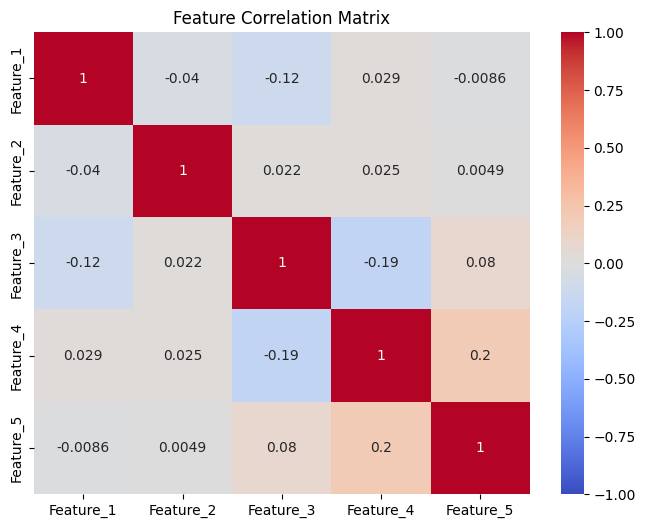

In [18]:
# Example feature data (replace this with actual data)
import seaborn as sns
import pandas as pd

# Create a correlation matrix
data = pd.DataFrame(np.random.rand(100, 5), columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'])

# Compute correlation matrix
corr_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()
